In [2]:
import data_retrieval_utils as dru
import fv3viz
import pandas as pd
import matplotlib.pyplot as plt
from run_dict import RUN_DICT, BASELINE_ALG, ML_ONLY_ALG, OCSVM_DEFAULT
import xarray as xr

fv3viz.use_colorblind_friendly_style()

/home/claytons/miniconda3/envs/fv3net/lib/python3.8/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [4]:
map_plot_names = {
    BASELINE_ALG: r"Baseline",
    ML_ONLY_ALG: r"ML-corrected $g_{\mathrm{Tq}}$",
    OCSVM_DEFAULT: r"ND ML $g_{\mathrm{Tquv}}, \eta_{\mathrm{Tq, OCSVM}}$",
}
runs = {name: RUN_DICT[name] for name in map_plot_names}

In [5]:
diags_complete = dru.get_diags_complete_downloaded(runs)

In [6]:
temp_biases = xr.concat(
    [diags_complete[name].tmp850_time_mean_bias.assign_coords(dru.COMMON_COORDS).to_dataset(name="ds")
     for name in map_plot_names],
    dim=pd.Index(map_plot_names.values(), name="run")
)

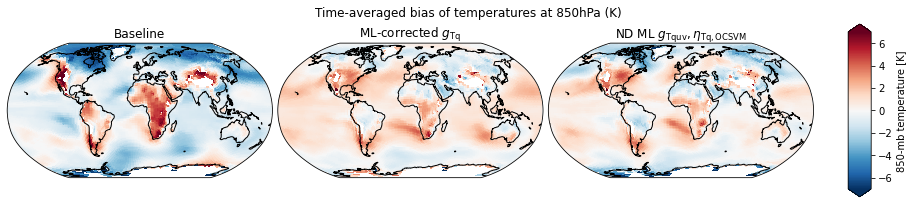

In [8]:
fig, subplots, _, _, _  = fv3viz.plot_cube(
    temp_biases[["ds"]].merge(dru.GRID),   
    "ds",
    col="run",
    vmin=-7,
    vmax=7
)
for i, title in enumerate(map_plot_names.values()):
    subplots[0][i].set_title(title)
fig.set_size_inches(16, 3)
fig.suptitle("Time-averaged bias of temperatures at 850hPa (K)")
fig.show()

In [9]:
precip_biases = xr.concat(
    [diags_complete[name].total_precip_to_surface_time_mean_bias.assign_coords(dru.COMMON_COORDS).to_dataset(name="ds")
     for name in map_plot_names],
    dim=pd.Index(map_plot_names.values(), name="run")
)

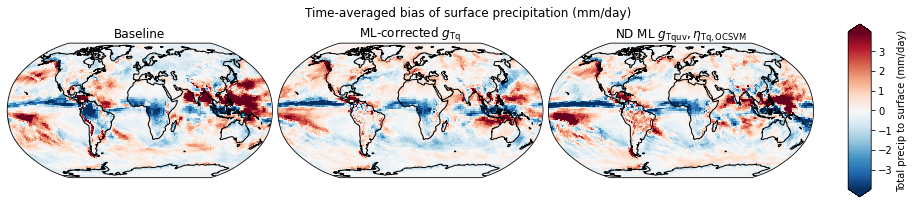

In [10]:
fig, subplots, _, cbar, _  = fv3viz.plot_cube(
    precip_biases[["ds"]].merge(dru.GRID),   
    "ds",
    col="run",
)
for i, title in enumerate(map_plot_names.values()):
    subplots[0][i].set_title(title)
cbar.set_label("Total precip to surface (mm/day)")
fig.set_size_inches(16, 3)
fig.suptitle("Time-averaged bias of surface precipitation (mm/day)")
fig.show()

### AMS Abstract figure

In [11]:
ams_map_plot_names = {
    BASELINE_ALG: r"Baseline",
    ML_ONLY_ALG: r"ML without wind or novelty detection",
    OCSVM_DEFAULT: r"ML with wind and novelty detection",
}

In [12]:
ams_temp_biases = xr.concat(
    [diags_complete[name].tmp850_time_mean_bias.assign_coords(dru.COMMON_COORDS).to_dataset(name="ds")
     for name in ams_map_plot_names],
    dim=pd.Index(ams_map_plot_names.values(), name="run")
)

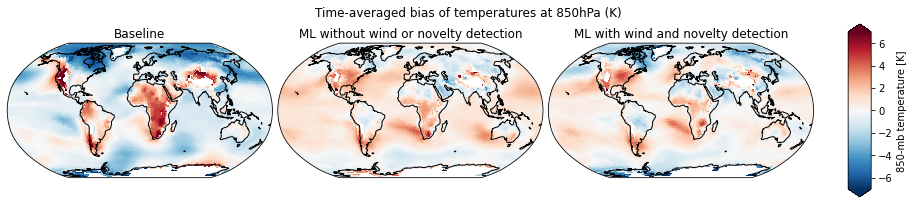

In [13]:
fig, subplots, _, _, _  = fv3viz.plot_cube(
    ams_temp_biases[["ds"]].merge(dru.GRID),   
    "ds",
    col="run",
    vmin=-7,
    vmax=7
)
for i, title in enumerate(ams_map_plot_names.values()):
    subplots[0][i].set_title(title)
fig.set_size_inches(16, 3)
fig.suptitle("Time-averaged bias of temperatures at 850hPa (K)")
fig.show()